<a href="https://colab.research.google.com/github/Preetika764/Machine-Learning/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install numpy mnist matplotlib sklearn
import numpy as np
from matplotlib import pyplot as plt
import mnist
import matplotlib
import os
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [64]:


def cost_function(y_true, y_pred):
    """
    Computes the Mean Square Error between a ground truth vector and a prediction vector
    Parameters:
    ---
    y_true: ground-truth vector
    y_pred: prediction vector
    Returns:
    ---
    cost: a scalar value representing the loss
    """
    n = y_pred.shape[1]
    cost = (1./(2*n)) * np.sum((y_true - y_pred) ** 2)
    return cost

def cost_function_prime(y_true, y_pred):
    """
    Computes the derivative of the loss function w.r.t the activation of the output layer
    Parameters:
    ---
    y_true: ground-truth vector
    y_pred: prediction vector
    Returns:
    ---
    cost_prime: derivative of the loss w.r.t. the activation of the output
    shape: (n[L], batch_size)
    """
    
    # Calculate the derivative of the cost function
    
    #derivative of cost_function 
    cost_prime = (y_pred - y_true)
    return cost_prime

In [65]:
X_train = mnist.train_images()
y_train = mnist.train_labels()
X_test = mnist.test_images()
y_test = mnist.test_labels()

X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape((-1,784))
X_test = X_test.reshape((-1,784))
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1, 1))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

images = X_train
labels = y_train

#print(X_train.ndim)

(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)


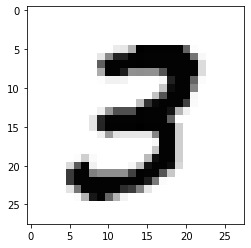

In [66]:
x = X_train[7].reshape(28,28)
plt.imshow(x, cmap='Greys')

In [67]:

    
def activation(x):
    return 1 / ( 1+ np.exp(-1*x))
def d_activation(x):
    return activation(x) * (1 - activation(x))

def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


In [68]:
class NeuralNetwork(object):
    '''
    This is a custom neural netwok package built from scratch with numpy.
    The Neural Network as well as its parameters and training method and procedure will
    reside in this class.
    Parameters
    ---
    size: list of number of neurons per layer
    Examples
    ---
    >>> import NeuralNetwork
    >>> nn = NeuralNetwork([2, 3, 4, 1])

    This means :
    1 input layer with 2 neurons
    1 hidden layer with 3 neurons
    1 hidden layer with 4 neurons
    1 output layer with 1 neuron

    '''

    def __init__(self, size, seed=42):
        '''
        Instantiate the weights and biases of the network
        weights and biases are attributes of the NeuralNetwork class
        They are updated during the training
        '''
        self.seed = seed
        np.random.seed(self.seed)
        self.size = size
        # biases are initialized randomly
        self.biases = [np.random.rand(n, 1) for n in self.size[1:]]

        
        # initialize the weights randomly

        #For the GAN
        
        self.Discriminator_W1 = np.random.normal(size=(784,128),scale=(1. / np.sqrt(784 / 2.)))   *0.002
        self.Discriminator_b1 = np.zeros(128)

        self.Discriminator_W2 = np.random.normal(size=(128,1),scale=(1. / np.sqrt(128 / 2.)))     *0.002
        self.Discriminator_b2 = np.zeros(1)


        self.Generator_W1 = np.random.normal(size=(100,128),scale=(1. / np.sqrt(100 / 2.)))   *0.002
        self.Generator_b1 = np.zeros(128)

        self.Generator_W2 = np.random.normal(size=(128,784),scale=(1. / np.sqrt(128 / 2.)))   *0.002
        self.Generator_b2 = np.zeros(784)
    
        """
        Be careful with the dimensions of the weights
        The dimensions of the weight of any particular layer will depend on the
        size of the current layer and the previous layer
        Example: Size = [16,8,4,2]
        The weight file will be a list with 3 matrices with shapes:
        (8,16) for weights connecting layers 1 (16) and 2(8)
        (4,8) for weights connecting layers 2 (8) and 4(4)
        (2,4) for weights connecting layers 3 (4) and 4(2)
        Each matrix will be initialized with random values
        """
        #self.weights

        # x-1 is the number of weight matrices
        # He initialization in which we generate random values from normal dist.
        # and multiply by sq root of 2* (1/input units)

        x = len(self.size) 
        #self.weights = [(np.random.randn(self.size[i], self.size[i-1])* np.sqrt(1/self.size[i-1]) for i in range(1,x)]
        self.weights = [np.random.randn(self.size[i], self.size[i-1]) * np.sqrt(1 / self.size[i-1]) for i in range(1, x)]



    def forward(self, input):
        '''
        Perform a feed forward computation
        Parameters
        ---
        input: data to be fed to the network with
        shape: (input_shape, batch_size)
        Returns
        ---
        a: ouptut activation (output_shape, batch_size)
        pre_activations: list of pre-activations per layer
        each of shape (n[l], batch_size), where n[l] is the number
        of neuron at layer l
        activations: list of activations per layer
        each of shape (n[l], batch_size), where n[l] is the number
        of neuron at layer l
        '''
        a = input
        pre_activations = []
        activations = [a]
        # TODO
        # what does the zip function do?
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, a) + b
            a  = activation(z)
            pre_activations.append(z)
            activations.append(a)
        return a, pre_activations, activations

    """
    Resources:
    https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/
    https://hmkcode.github.io/ai/backpropagation-step-by-step/
    """
    def compute_deltas(self, pre_activations, y_true, y_pred):
        """
        Computes a list containing the values of delta for each layer using
        a recursion
        Parameters:
        ---
        pre_activations: list of of pre-activations. each corresponding to a layer
        y_true: ground truth values of the labels
        y_pred: prediction values of the labels
        Returns:
        ---
        deltas: a list of deltas per layer

        """

        # initialize array to store the derivatives
        deltas = [0] * (len(self.size) - 1)

        #TODO
        # Calculate the delta for each layer
        # This is the first step in calculating the derivative
        #The last layer is calculated as derivative of cost function *  derivative of sigmoid ( pre-activations of last layer )
        deltas[-1] = cost_function_prime(y_true, y_pred) * activation(pre-activations[-1], derivative = True)

        #TODO
        # Recursively calculate delta for each layer from the previous layer
        for l in range(len(deltas) - 2, -1, -1):
            deltas[l] = np.dot(self.weights[l+1].transpose(), deltas[l+1]) * activation(pre_activation[l], derivative = True)
            # deltas of layer l depend on the weights of layer l and l+1 and on the sigmoid derivative of the pre-activations of layer l
            # Note that we use a dot product when multipying the weights and the deltas
            # Check their shapes to ensure that their shapes conform to the requiremnts (You may need to transpose some of the matrices)
            # The final shape of deltas of layer l must be the same as that of the activations of layer l
            # Check if this is true
            # delta[l] =
        return deltas

    

    def backpropagate(self, deltas, pre_activations, activations):
        """
        Applies back-propagation and computes the gradient of the loss
        w.r.t the weights and biases of the network
        Parameters:
        ---
        deltas: list of deltas computed by compute_deltas
        pre_activations: a list of pre-activations per layer
        activations: a list of activations per layer
        Returns:
        ---
        dW: list of gradients w.r.t. the weight matrices of the network
        db: list of gradients w.r.t. the biases (vectors) of the network

        """
        dW = []
        db = []
        deltas = [0] + deltas
        for l in range(1, len(self.size)):
            # TODO
            # Compute the derivatives of the weights and the biases from the delta values calculated earlier
            # dW_temp depends on the activations of layer l-1 and the deltas of layer l
            # dB_temp depends only on the deltas of layer l
            # Again be careful of the dimensions and ensure that the dW matrix has the same shape as W
            # dW =
            # dB =
            dW_temp = np.dot(deltas[l], activations[l-1].transpose())
            dB_temp = deltas[l]
            dW.append(dW_temp)
            db.append(np.expand_dims(db_temp.mean(axis=1), 1))
        return dW, db

    def plot_loss(self,epochs,train,test):
        """
        Plots the loss function of the train test data measured every epoch
        Parameters:
        ---
        epochs: number of epochs for training
        train: list of losses on the train set measured every epoch
        test: list of losses on the test set measured every epoch
        """

        plt.subplot(211)
        plt.title('Training Cost (loss)')
        plt.plot(range(epochs),train)

        plt.subplot(212)
        plt.title('Test Cost (loss)')
        plt.plot(range(epochs),test)

        plt.subplots_adjust(hspace=0.5)
        plt.show()

    def train(self, X, y, batch_size, epochs, lr, beta_1, beta_2, eps, print_every=10, plot_every=None):
        """
        Trains the network using the gradients computed by back-propagation
        Splits the data in train and validation splits
        Processes the training data by batches and trains the network using batch gradient descent
        Parameters:
        ---
        X: input data
        y: input labels
        batch_size: number of data points to process in each batch
        epochs: number of epochs for the training
        learning_rate: value of the learning rate
        validation_split: percentage of the data for validation
        print_every: the number of epochs by which the network activations the loss and accuracy metrics for train and validations splits
        plot_every: the number of epochs by which the network plots the decision boundary

        Returns:
        ---
        history: dictionary of train and validation metrics per epoch
            train_acc: train accuracy
            test_acc: validation accuracy
            train_loss: train loss
            test_loss: validation loss
        This history is used to plot the performance of the model
        """
        history_train_losses = []
        history_train_accuracies = []
        history_test_losses = []
        history_test_accuracies = []

        # TODO
        # Read about the train_test_split function
        """
        
        x_train, x_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2, )
        x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

        epoch_iterator = range(epochs)

        for e in epoch_iterator:
            if x_train.shape[1] % batch_size == 0:
                n_batches = int(x_train.shape[1] / batch_size)
            else:
                n_batches = int(x_train.shape[1] / batch_size ) - 1

            x_train, y_train = shuffle(x_train.T, y_train.T)
            x_train, y_train = x_train.T, y_train.T

            batches_x = [x_train[:, batch_size*i:batch_size*(i+1)] for i in range(0, n_batches)]
            batches_y = [y_train[:, batch_size*i:batch_size*(i+1)] for i in range(0, n_batches)]
            

            train_losses = []
            train_accuracies = []

            test_losses = []
            test_accuracies = []

            dw_per_epoch = [np.zeros(w.shape) for w in self.weights]
            db_per_epoch = [np.zeros(b.shape) for b in self.biases]

            for batch_x, batch_y in zip(batches_x, batches_y):
                batch_y_pred, pre_activations, activations = self.forward(batch_x)
                deltas = self.compute_deltas(pre_activations, batch_y, batch_y_pred)
                dW, db = self.backpropagate(deltas, pre_activations, activations)
                for i, (dw_i, db_i) in enumerate(zip(dW, db)):
                    dw_per_epoch[i] += dw_i / batch_size
                    db_per_epoch[i] += db_i / batch_size

                batch_y_train_pred = self.predict(batch_x)

                train_loss = cost_function(batch_y, batch_y_train_pred)
                train_losses.append(train_loss)
                train_accuracy = accuracy_score(batch_y.T, batch_y_train_pred.T)
                train_accuracies.append(train_accuracy)

                batch_y_test_pred = self.predict(x_test)

                test_loss = cost_function(y_test, batch_y_test_pred)
                test_losses.append(test_loss)
                test_accuracy = accuracy_score(y_test.T, batch_y_test_pred.T)
                test_accuracies.append(test_accuracy)


            # weight update

            # TODO
            # What does the enumerate function do?
            for i, (dw_epoch, db_epoch) in enumerate(zip(dw_per_epoch, db_per_epoch)):
                
                
                # Update the weights using the backpropagation algorithm implemented earlier
                # W = W - learning_rate * derivatives (dW)
                # b = b - learning_rate * derivatives (db)
                self.weights[i]  = self.weights[i] - learning_rate * dw_epoch
                self.biases[i] = self.biases[i] - learning_rate * db_epoch

            history_train_losses.append(np.mean(train_losses))
            history_train_accuracies.append(np.mean(train_accuracies))

            history_test_losses.append(np.mean(test_losses))
            history_test_accuracies.append(np.mean(test_accuracies))


            if e % print_every == 0:
                print('Epoch {} / {} | train loss: {} | train accuracy: {} | val loss : {} | val accuracy : {} '.format(
                    e, epochs, np.round(np.mean(train_losses), 3), np.round(np.mean(train_accuracies), 3),
                    np.round(np.mean(test_losses), 3),  np.round(np.mean(test_accuracies), 3)))

        self.plot_loss(epochs,train_loss,test_loss)

        history = {'epochs': epochs,
                   'train_loss': history_train_losses,
                   'train_acc': history_train_accuracies,
                   'test_loss': history_test_losses,
                   'test_acc': history_test_accuracies
                   }
        return history
        """
        


        Discriminator_W1 = self.Discriminator_W1
        Discriminator_b1 = self.Discriminator_b1

        Discriminator_W2 = self.Discriminator_W2
        Discriminator_b2 = self.Discriminator_b2


        Generator_W1 = self.Generator_W1
        Generator_b1 = self.Generator_b1

        Generator_W2 = self.Generator_W2 
        Generator_b2 = self.Generator_b2


        

        for iter in range(epochs):

            num = np.random.randint(59999)
            current_image = np.expand_dims(images[num],axis=0)

    #Generating the fake data

            Z = np.random.uniform(0, 1., size=[1, 100])
            Generator_l1 = Z.dot(Generator_W1) + Generator_b1
            Generator_l1A = activation(Generator_l1)
            Generator_l2 = Generator_l1A.dot(Generator_W2) + Generator_b2
    
            cfd = activation(Generator_l2)

    #Forward propagation for real data

            Discriminator_l1_r = current_image.dot(Discriminator_W1) + Discriminator_b1
            Discriminator_l1_rA = activation(Discriminator_l1_r)
            Discriminator_l2_r = Discriminator_l1_rA.dot(Discriminator_W2) + Discriminator_b2
            Discriminator_l2_rA = activation(Discriminator_l2_r)

    #Forward propagation for fake data
            Discriminator_l1_f = cfd.dot(Discriminator_W1) + Discriminator_b1
            Discriminator_l1_fA = activation(Discriminator_l1_f)
            Discriminator_l2_f = Discriminator_l1_fA.dot(Discriminator_W2) + Discriminator_b2
            Discriminator_l2_fA = activation(Discriminator_l2_f)

    #Now we calculate the cost for the discriminator

            Discriminator_cost = -np.log(Discriminator_l2_rA) + np.log(1.0- Discriminator_l2_fA)


    #Back propagation for discriminator

            grad_f_w2 =  (Discriminator_l1_fA).T.dot((1/(1.0- Discriminator_l2_fA)) * (d_activation(Discriminator_l2_f))) 
            grad_f_b2 = (1/(1.0- Discriminator_l2_fA)) * (d_activation(Discriminator_l2_f))

            grad_f_w1 = cfd.T.dot((((1/(1.0- Discriminator_l2_fA))* (d_activation(Discriminator_l2_f))).dot(Discriminator_W2.T)) * (d_activation(Discriminator_l1_f))) 
            grad_f_b1 = (((1/(1.0- Discriminator_l2_fA))* (d_activation(Discriminator_l2_f))).dot(Discriminator_W2.T)) * (d_activation(Discriminator_l1_f))

 
            grad_r_w2 = (Discriminator_l1_rA).T.dot((- 1/Discriminator_l2_rA) * (d_activation(Discriminator_l2_r))) 
            grad_r_b2 = (- 1/Discriminator_l2_rA)* (d_activation(Discriminator_l2_r))

            grad_r_w1 = current_image.T.dot((((- 1/Discriminator_l2_rA) * (d_activation(Discriminator_l2_r))).dot(Discriminator_W2.T)) * (d_activation(Discriminator_l1_r))) 
            grad_r_b1 = (((- 1/Discriminator_l2_rA) * (d_activation(Discriminator_l2_r))).dot(Discriminator_W2.T))* (d_activation(Discriminator_l1_r))

            grad_w1 =grad_f_w1 + grad_r_w1
            grad_b1 =grad_f_b1 + grad_r_b1
    
            grad_w2 =grad_f_w2 + grad_r_w2
            grad_b2 =grad_f_b2 + grad_r_b2

    # ---- Update Gradient ----

            v1,m1 = 0,0
            v2,m2 = 0,0
            v3,m3 = 0,0
            v4,m4 = 0,0
            m1 = beta_1 * m1 + (1 - beta_1) * grad_w1
            v1 = beta_2 * v1 + (1 - beta_2) * grad_w1 ** 2

            m2 = beta_1 * m2 + (1 - beta_1) * grad_b1
            v2 = beta_2 * v2 + (1 - beta_2) * grad_b1 ** 2

            m3 = beta_1 * m3 + (1 - beta_1) * grad_w2
            v3 = beta_2 * v3 + (1 - beta_2) * grad_w2 ** 2

            m4 = beta_1 * m4 + (1 - beta_1) * grad_b2
            v4 = beta_2 * v4 + (1 - beta_2) * grad_b2 ** 2

            Discriminator_W1 = Discriminator_W1 - (lr / (np.sqrt(v1 /(1-beta_2) ) + eps)) * (m1/(1-beta_1))
            Discriminator_b1 = Discriminator_b1 - (lr / (np.sqrt(v2 /(1-beta_2) ) + eps)) * (m2/(1-beta_1))
    
            Discriminator_W2 = Discriminator_W2 - (lr / (np.sqrt(v3 /(1-beta_2) ) + eps)) * (m3/(1-beta_1))
            Discriminator_b2 = Discriminator_b2 - (lr / (np.sqrt(v4 /(1-beta_2) ) + eps)) * (m4/(1-beta_1))


    #Forward propagation for generator

            Z = np.random.uniform(-1., 1., size=[1, 100])
            Generator_l1 = Z.dot(Generator_W1) + Generator_b1
            Generator_l1A = activation(Generator_l1)
            Generator_l2 = Generator_l1A.dot(Generator_W2) + Generator_b2
  
            cfd = activation(Generator_l2)

            Discriminator_l1 = cfd.dot(Discriminator_W1) + Discriminator_b1
            Discriminator_l1_A = activation(Discriminator_l1)
            Discriminator_l2 = Discriminator_l1_A.dot(Discriminator_W2) + Discriminator_b2
            Discriminator_l2_A = activation(Discriminator_l2)

     #Calculation the cost for generator

            Generator_cost = -np.log(Discriminator_l2_A)


    #Back propagation for generator

            g1 = ((-1/Discriminator_l2_A) * d_activation(Discriminator_l2).dot(Discriminator_W2.T) * (d_activation(Discriminator_l1))).dot(Discriminator_W1.T)
            grad_Generator_w2 = (Generator_l1A).T.dot(g1 * ( d_activation(Generator_l2)))
            grad_Generator_b2 = (g1 * ( d_activation(Generator_l2)))

            grad_Generator_w1 = Z.T.dot(( (g1 *  d_activation(Generator_l2)).dot(Generator_W2.T)) * d_activation(Generator_l1))
            grad_Generator_b1 = ( (g1 *  d_activation(Generator_l2)).dot(Generator_W2.T))* (d_activation(Generator_l1))

            v5,m5 = 0,0
            v6,m6 = 0,0
            v7,m7 = 0,0
            v8,m8 = 0,0
            m5 = beta_1 * m5 + (1 - beta_1) * grad_Generator_w1
            v5 = beta_2 * v5 + (1 - beta_2) * grad_Generator_w1 ** 2

            m6 = beta_1 * m6 + (1 - beta_1) * grad_Generator_b1
            v6 = beta_2 * v6 + (1 - beta_2) * grad_Generator_b1 ** 2

            m7 = beta_1 * m7 + (1 - beta_1) * grad_Generator_w2
            v7 = beta_2 * v7 + (1 - beta_2) * grad_Generator_w2 ** 2

            m8 = beta_1 * m8 + (1 - beta_1) * grad_Generator_b2
            v8 = beta_2 * v8 + (1 - beta_2) * grad_Generator_b2 ** 2

            Generator_W1 = Generator_W1 - (lr/ (np.sqrt(v5 /(1-beta_2) ) + eps)) * (m5/(1-beta_1))
            Generator_b1 = Generator_b1 - (lr / (np.sqrt(v6 /(1-beta_2) ) + eps)) * (m6/(1-beta_1))
    
            Generator_W2 = Generator_W2 - (lr / (np.sqrt(v7 /(1-beta_2) ) + eps)) * (m7/(1-beta_1))
            Generator_b2 = Generator_b2 - (lr / (np.sqrt(v8 /(1-beta_2) ) + eps)) * (m8/(1-beta_1))

            if iter == 0:
                lr = lr * 0.01
            if iter == 40:
                lr= lr * 0.01

 
            if iter%10 == 0:
        
        
                Z = np.random.uniform(0, 1., size=[16, 100]) 

                Generator_l1 = Z.dot(Generator_W1) + Generator_b1
                Generator_l1A = activation(Generator_l1)
                Generator_l2 = Generator_l1A.dot(Generator_W2) + Generator_b2
        
                cfd= activation(Generator_l2)
        
                fig = plot(cfd)
       
    def predict(self, a):
        '''
        Use the current state of the network to make predictions
        Parameters:
        ---
        a: input data, shape: (input_shape, batch_size)
        Returns:
        ---
        predictions: vector of output predictions
        '''
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, a) + b
            a = activation(z)
        predictions = (a > 0.5).astype(int)
        return predictions

# Author: Ahmed BESBES
# <ahmed.besbes@hotmail.com>



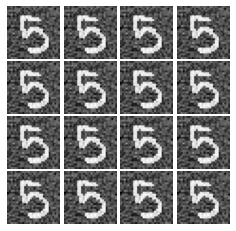

In [69]:
gan = NeuralNetwork([784,128,686,10])
gan.train(X_train, y_train, 100, 10,  0.0001, 0.9,0.999,0.00000001)